### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from math import ceil
from Ambrosia import pre_process_image
from skimage import io

In [2]:
# get path of image to ingest
wd = os.getcwd()
wd_image_path =  wd+"/"+"IMG_0269_clean.JPG" #"IMG_0011.JPG"
image_path = wd_image_path

# Initialize compound image

In [3]:
# Initialize image
ppi = pre_process_image(image_dir = image_path)

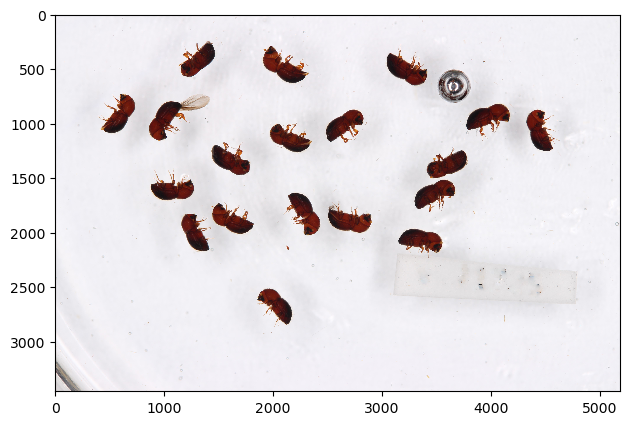

In [4]:
# input image
io.imshow(ppi.image)
plt.show()

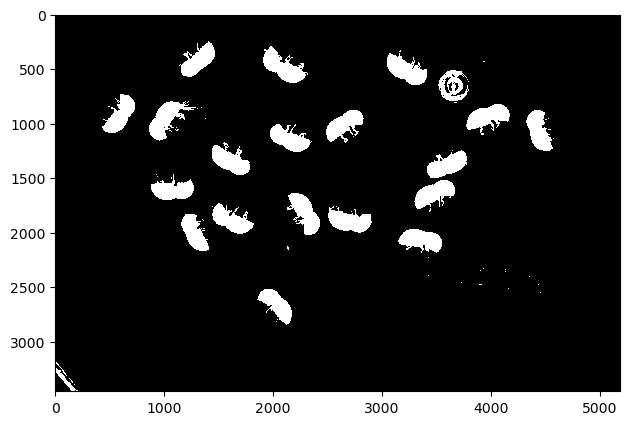

In [5]:
# input image
io.imshow(ppi.inv_bw_image)
plt.show()

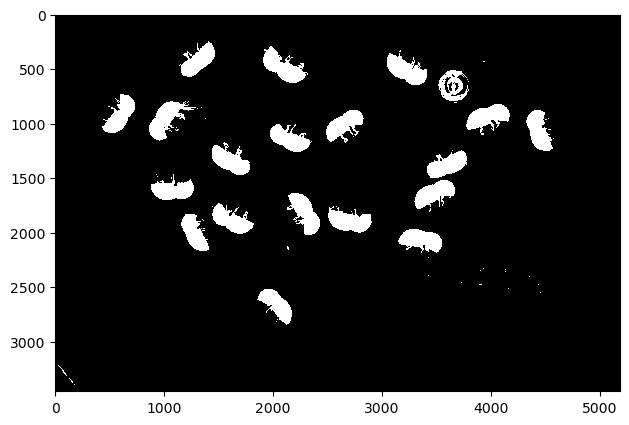

In [6]:
# input image
io.imshow(ppi.clear_inv_bw_image)
plt.show()

# Segment compound image into smaller images

In [7]:
# apply segmentation of blobs in image
ppi.segment(cluster_num=2, image_edge_buffer=50)

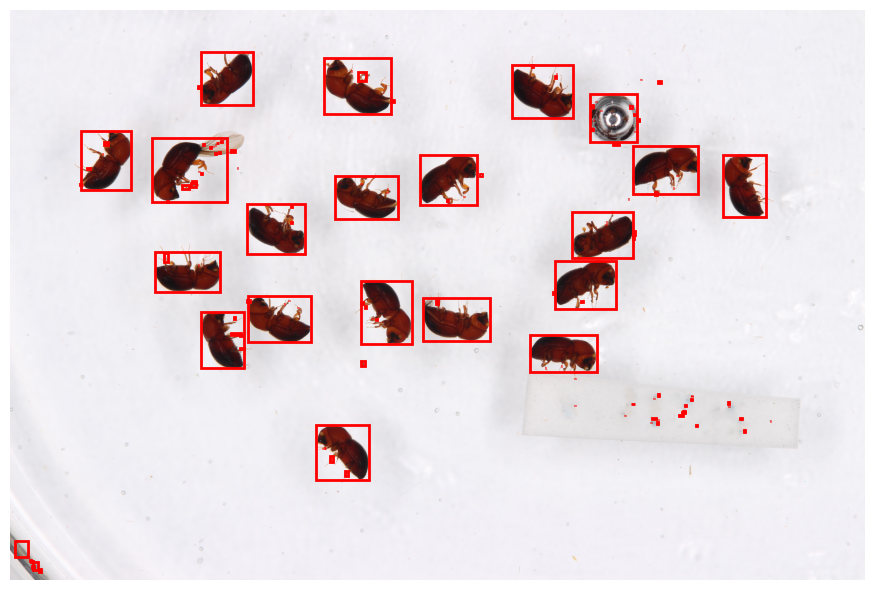

In [8]:
# plot boxes that will be used to extract 
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(ppi.image)
coord_df = ppi.image_properties_df
for i in range(len(coord_df)):
    data_i = coord_df.iloc[i]
    minr = data_i['bbox-0']
    minc = data_i['bbox-1']
    maxr = data_i['bbox-2']
    maxc =data_i['bbox-3']
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [9]:
# all artefacts dataframe
ppi.image_properties_df

centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  orientation  \
0     252.000000  1408.000000     252    1408     253    1409     0.785398   
1     424.759093  1313.377569     252    1155     577    1470    -0.850106   
2     485.402648  2091.239620     291    1906     632    2308     0.992280   
3     339.116883  3168.116883     332    3165     348    3172     0.046202   
4     514.955990  3221.756661     336    3045     655    3413     1.064298   
..           ...          ...     ...     ...     ...     ...          ...   
226  3342.674419   133.000000    3340     128    3348     138     0.979345   
227  3368.020080   153.839357    3345     139    3393     169     0.582669   
228  3376.923077   137.692308    3373     134    3383     142     0.671736   
229  3384.000000    90.000000    3384      90    3385      91     0.785398   
230  3397.967742   179.467742    3391     173    3406     188     0.738932   

     axis_major_length  axis_minor_length   area  area_filled  kmeans_label  
0             0.000000           0.000000      1            1             0  
1           402.728029         191.695341  55897        56827             1  
2           478.504153         202.635663  66547        66826             1  
3            16.233730           6.210819     77           77             0  
4           432.651005         199.071747  63508        63665             1  
..                 ...                ...    ...          ...           ...  
226          10.226478           6.408738     43           43             0  
227          54.141204           7.807259    249          251             0  
228          12.677701           3.526424     26           26             0  
229           0.000000           0.000000      1            1             0  
230          20.610220           4.168821     62           62             0  

[231 rows x 12 columns]

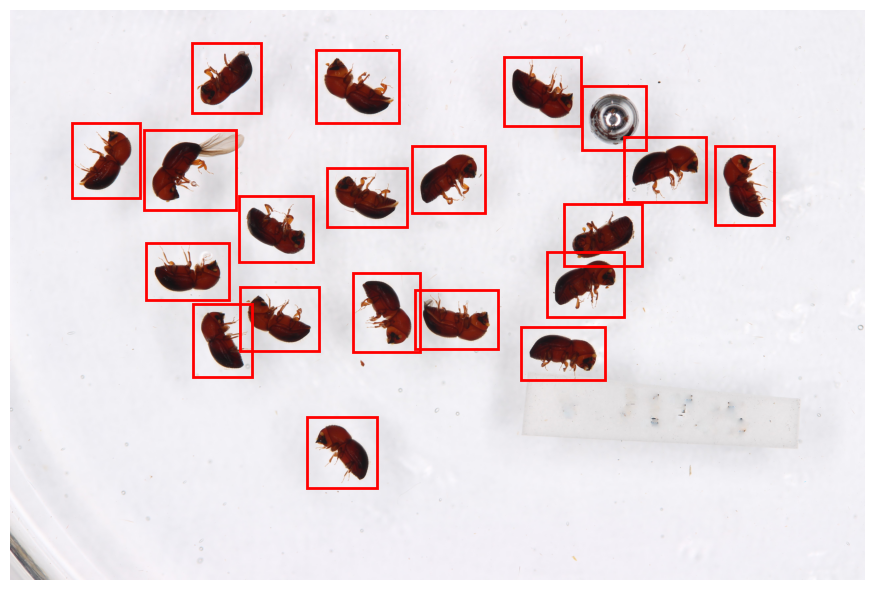

In [10]:
# plot boxes that will be used to extract 
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(ppi.image)
coord_df = ppi.image_selected_df
for i in range(len(coord_df)):
    data_i = coord_df.iloc[i]
    minr = data_i['bbox-0']
    minc = data_i['bbox-1']
    maxr = data_i['bbox-2']
    maxc =data_i['bbox-3']
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [11]:
ppi.image_selected_df

centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  orientation  \
0    424.759093  1313.377569     202    1105     627    1520    -0.850106   
1    485.402648  2091.239620     241    1856     682    2358     0.992280   
2    514.955990  3221.756661     286    2995     705    3463     1.064298   
3    659.618078  3648.038839     461    3468     849    3853     0.181142   
4    924.367560   597.599678     684     378    1140     786    -0.568485   
5    961.123984  1018.737184     727     813    1213    1368    -0.719845   
6    944.355487  3971.235462     772    3724    1165    4222    -1.264581   
7   1017.609245  2654.072710     826    2438    1230    2881    -0.986616   
8   1070.462301  4439.999440     826    4275    1306    4633     0.297031   
9   1145.558105  2149.215395     959    1923    1317    2405     1.154502   
10  1341.701992  1608.151990    1127    1385    1528    1838     1.050130   
11  1382.113065  3598.372318    1175    3359    1554    3829    -1.180502   
12  1614.168134  1080.755849    1415     827    1757    1325    -1.547111   
13  1646.968232  3479.749023    1469    3254    1862    3721    -1.139109   
14  1824.660912  2291.533595    1593    2078    2074    2484     0.511372   
15  1889.659833  1618.074574    1682    1392    2065    1874     1.116057   
16  1896.986813  2700.508661    1698    2454    2056    2958     1.380842   
17  2006.219674  1279.018927    1780    1109    2223    1467     0.453246   
18  2073.010503  3359.940980    1920    3100    2243    3606     1.407372   
19  2664.140160  2033.430667    2466    1802    2899    2224     0.770049   

    axis_major_length  axis_minor_length   area  area_filled  kmeans_label  
0          402.728029         191.695341  55897        56827             1  
1          478.504153         202.635663  66547        66826             1  
2          432.651005         199.071747  63508        63665             1  
3          317.400354         265.596263  43590        63265             1  
4          426.911157         186.563751  56437        56468             1  
5          463.290342         219.629286  65799        66429             1  
6          438.281737         203.105663  63195        63540             1  
7          408.649080         204.609979  58369        58572             1  
8          426.640207         185.206455  57190        57249             1  
9          405.842802         192.011864  55916        56225             1  
10         409.475693         205.420115  59787        60043             1  
11         415.201385         188.792969  58391        58781             1  
12         420.890533         183.473224  55777        55818             1  
13         422.398862         195.561703  59619        59671             1  
14         450.503576         194.633394  63016        63100             1  
15         424.512499         191.910145  57607        57656             1  
16         442.524926         192.771886  61424        61526             1  
17         402.117986         174.812140  51672        51791             1  
18         426.786261         189.096952  59505        59830             1  
19         411.594151         172.344222  52219        52226             1

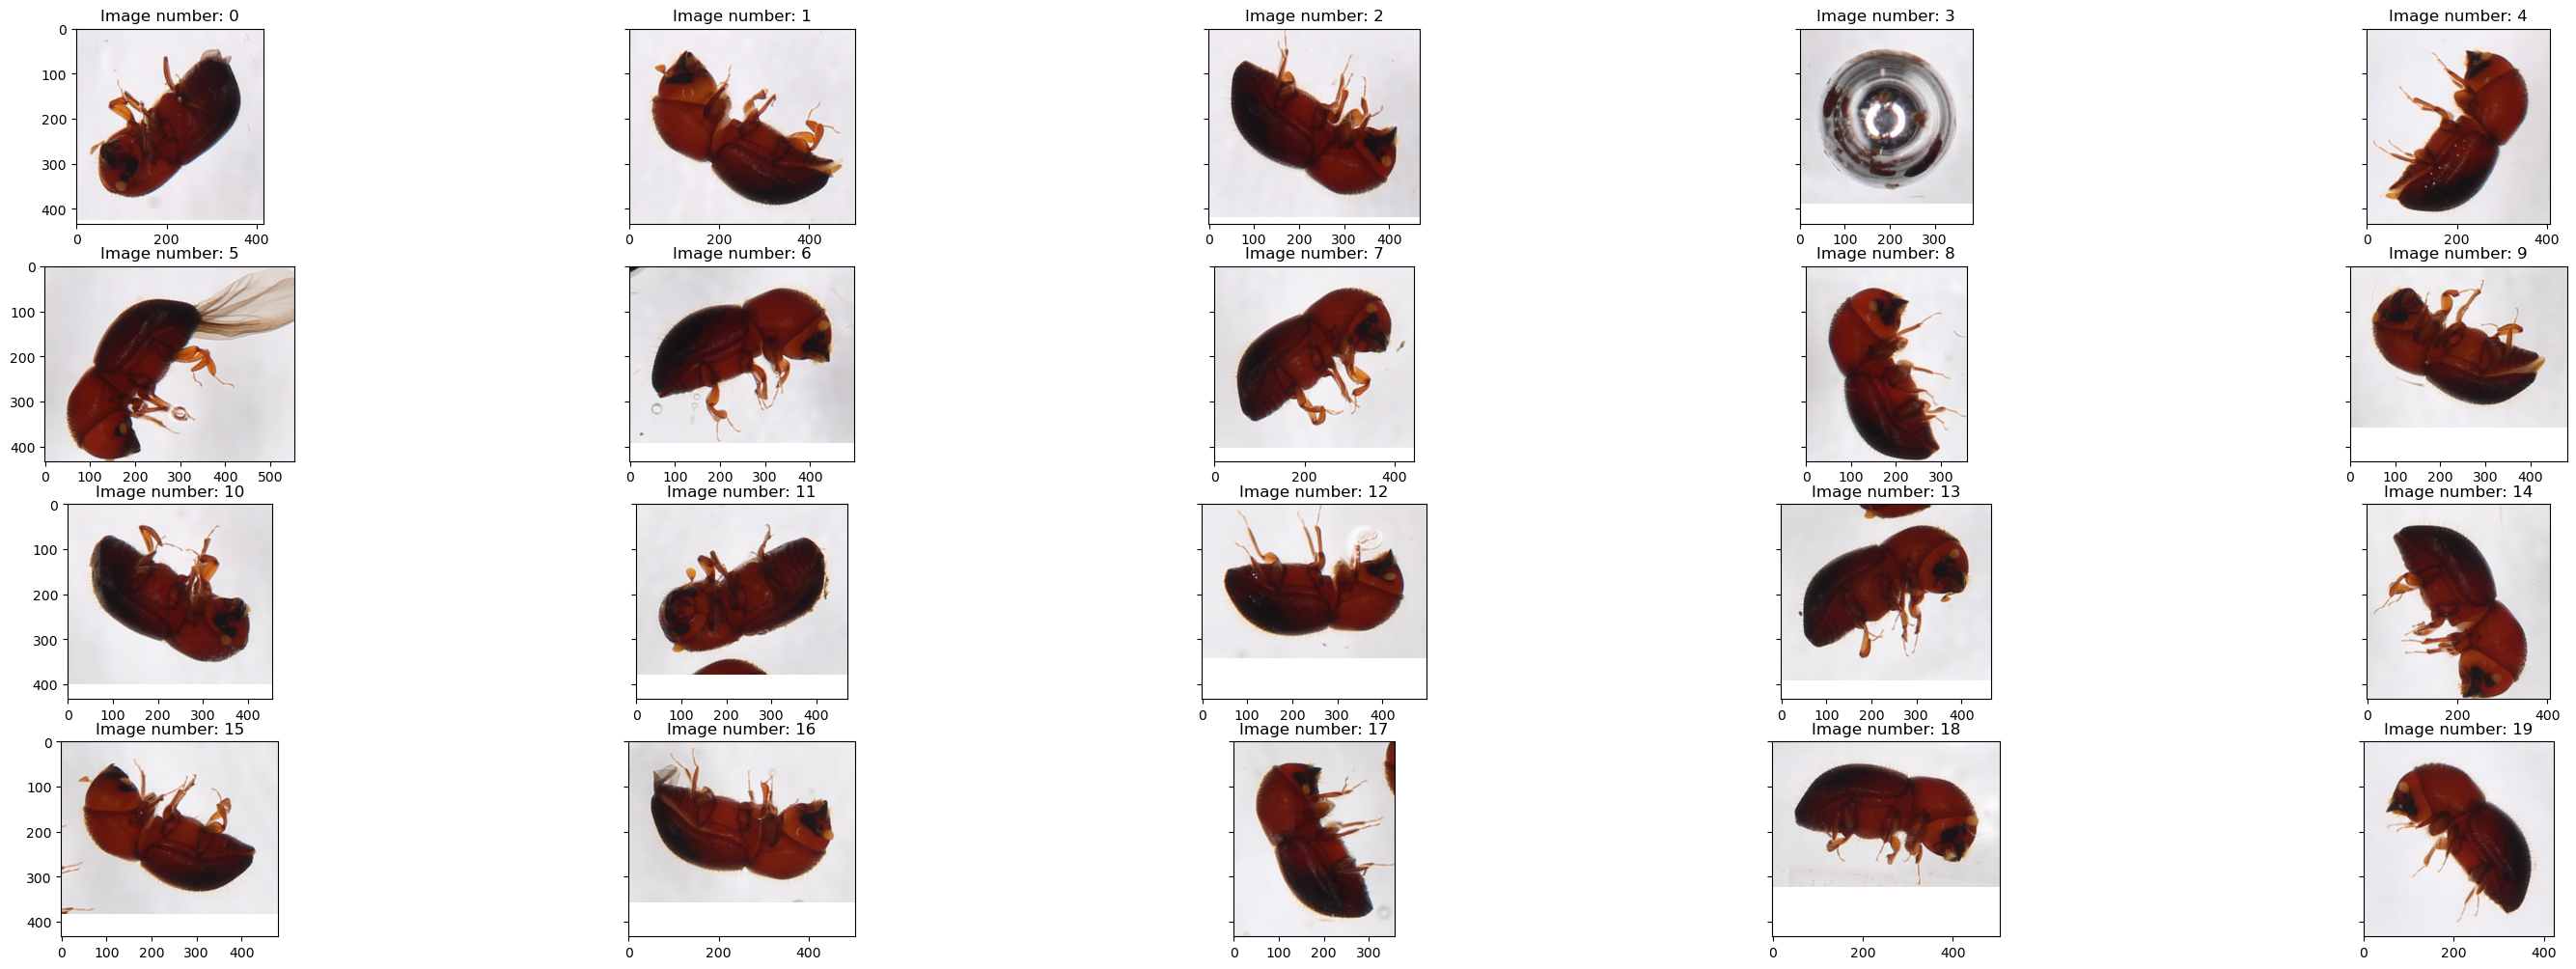

In [12]:
# define list of images
img_lst = ppi.col_image_lst

# plot pixel distribution values for all iamges in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = axes[i][j].imshow(img_lst[l])
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()

# Detect the outlier segment (ball bearing) from the compound image

In [13]:
# detect outlier 
ppi.detect_outlier()

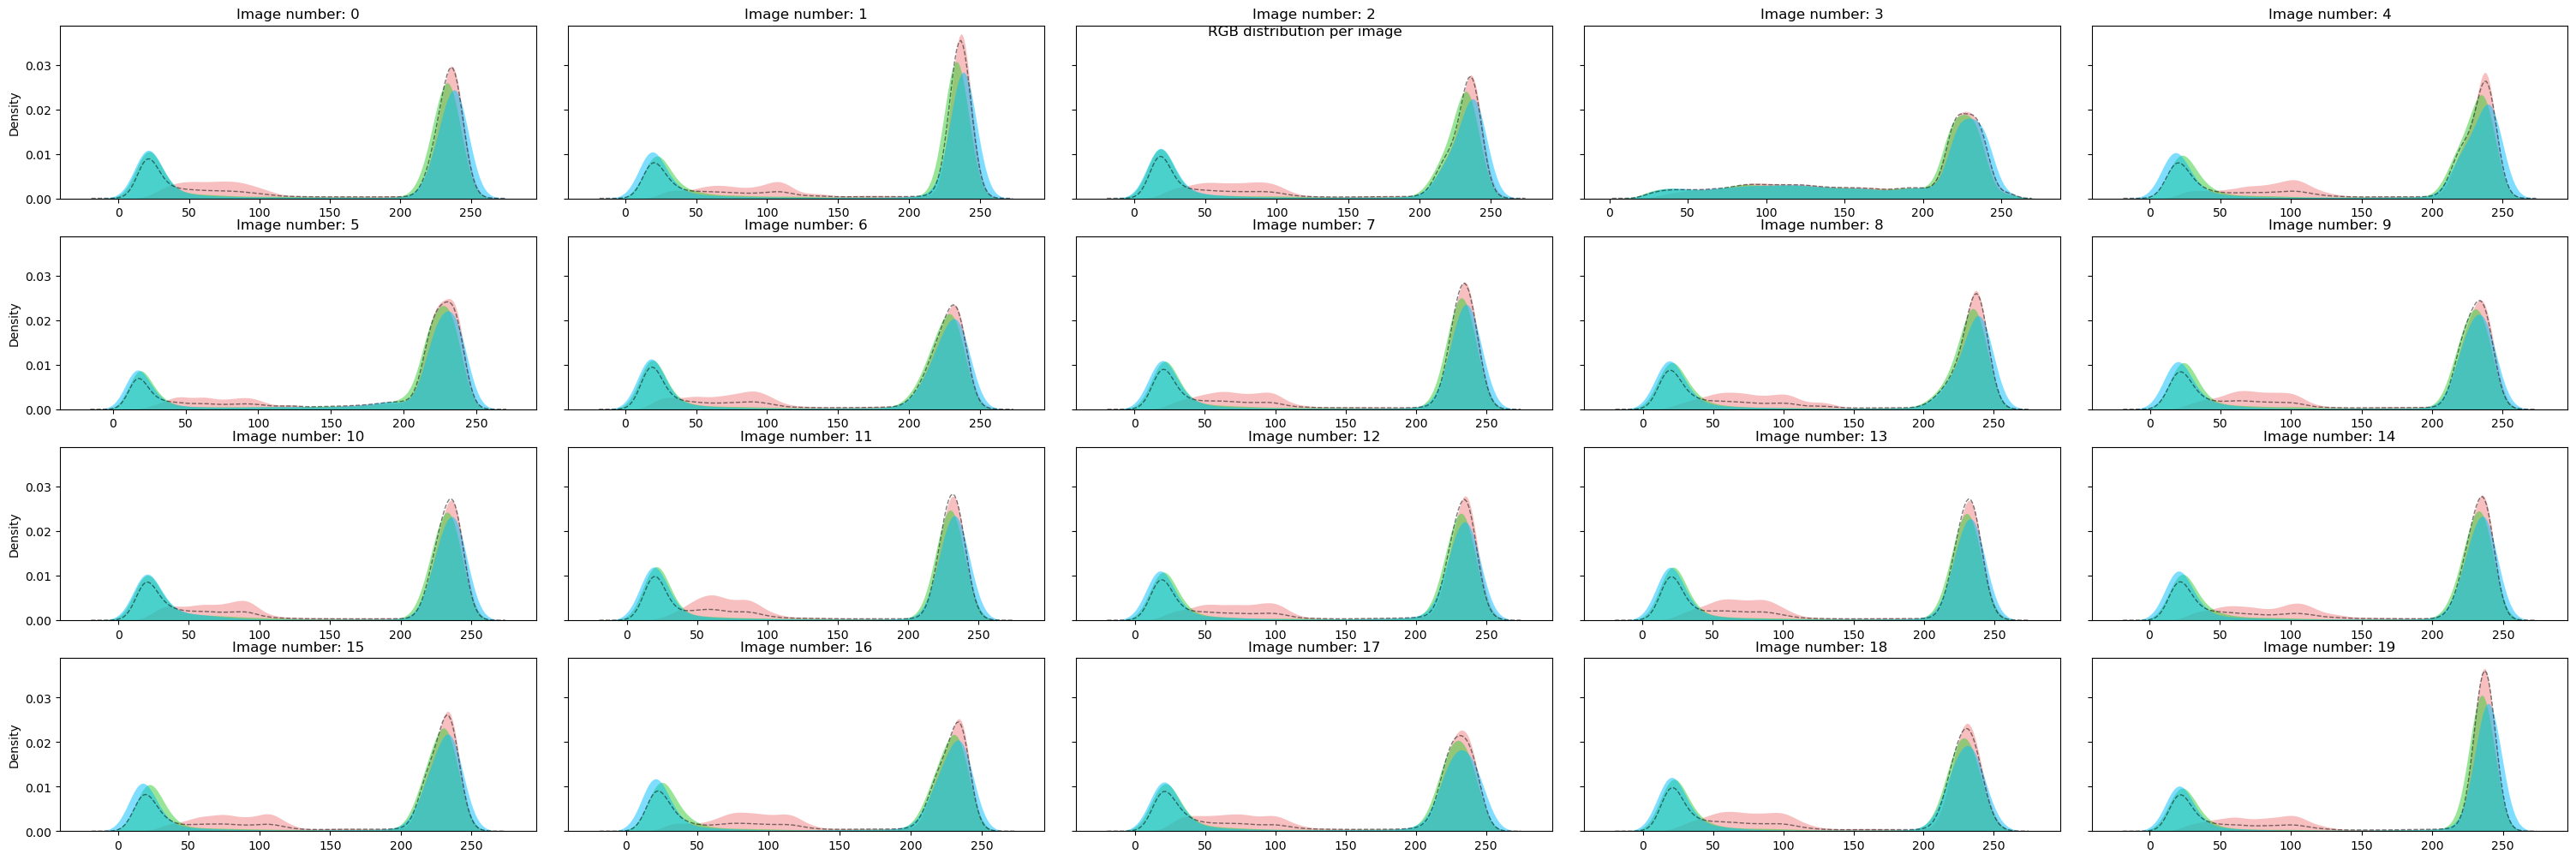

In [14]:
# plot pixel distribution values for all iamges in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
fig.suptitle('RGB distribution per image')

# initialize lists to store data in
r_ar_lst = ppi.r_ar_lst
g_ar_lst = ppi.g_ar_lst
b_ar_lst = ppi.b_ar_lst
all_ar_lst = ppi.all_ar_lst

l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = sns.kdeplot(ax=axes[i][j], data=r_ar_lst[l], color='lightcoral', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=g_ar_lst[l], color='limegreen', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=b_ar_lst[l], color='deepskyblue', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=all_ar_lst[l], color='black', fill=False, alpha=.5, linewidth=1, linestyle='--')
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()
# fig.figure.savefig("Image_RGB_density_distribution.png")

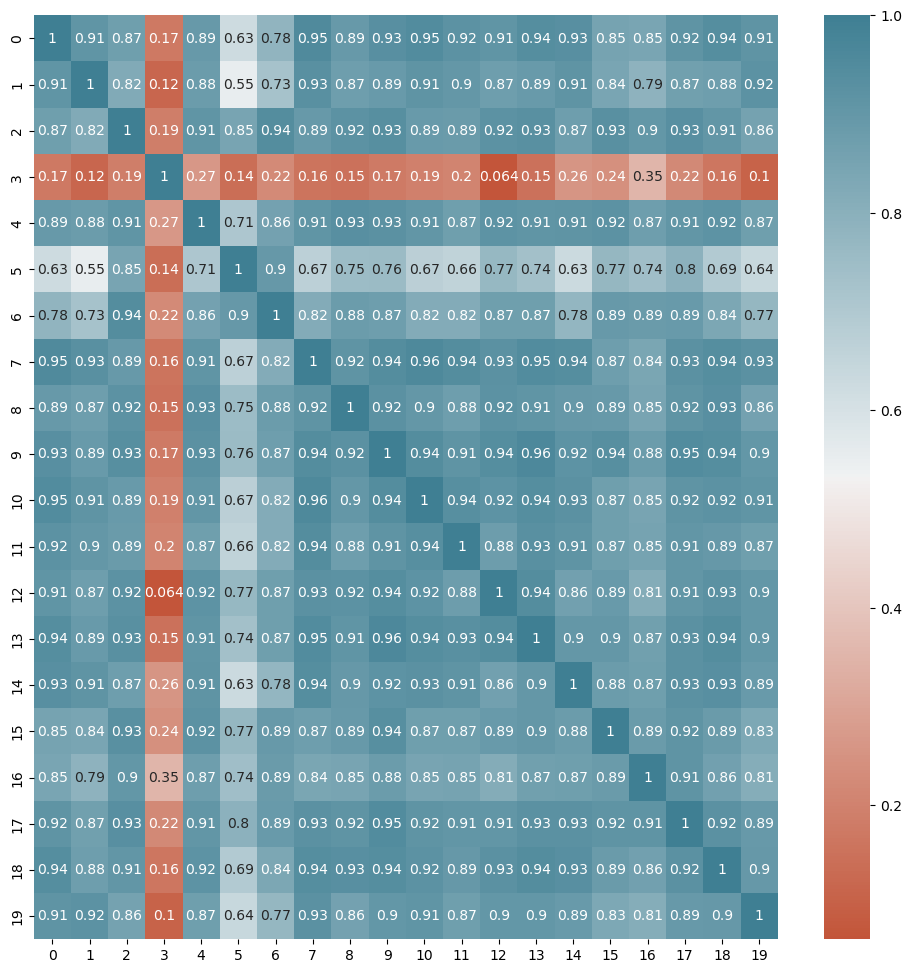

In [15]:
# Spearman correlation heatmap
corr_df = ppi.corr_coef
plt.figure(figsize=(12,12))
sns.heatmap(corr_df, annot=True, cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()

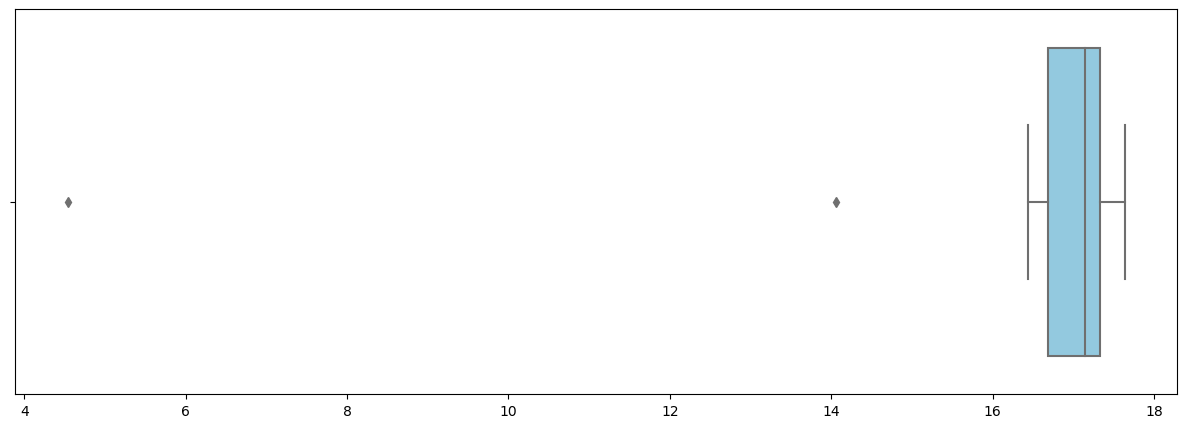

In [23]:
# plot boxplot of summmed correlation
plt.figure(figsize=(15, 5))
sns.boxplot(x=ppi.corr_coef_sum, color='skyblue')
# sns.violinplot(x=ppi.corr_coef_sum, inner="stick", color='skyblue')
plt.show()

# Estimate size

In [17]:
ppi.estimate_size(outlier_bw_image=ppi.outlier_bw_image, 
                          outlier_idx=ppi.outlier_idx, 
                          known_radius=1, 
                          canny_sigma=5)

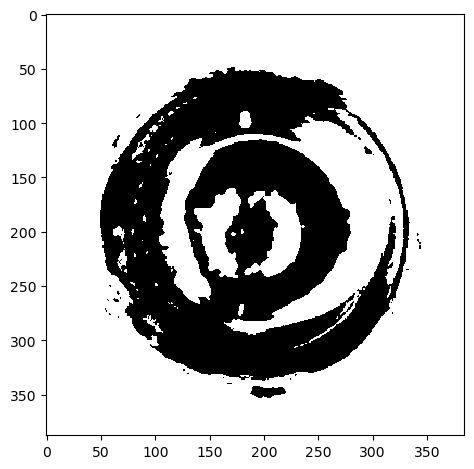

In [18]:
# print image detected as the outlier
io.imshow(ppi.outlier_bw_image)
plt.show()

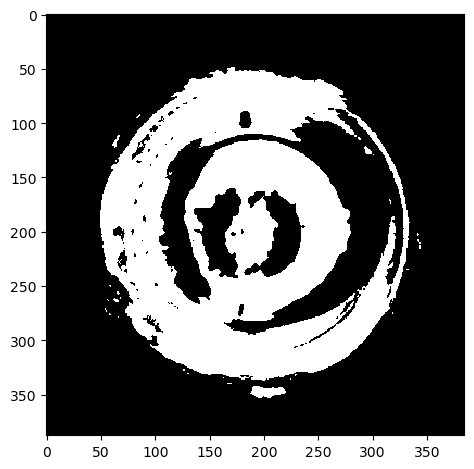

In [19]:
# print image detected as the outlier
bw_img = np.copy(ppi.inv_bw_image_lst[ppi.outlier_idx])
io.imshow(bw_img)
plt.show()

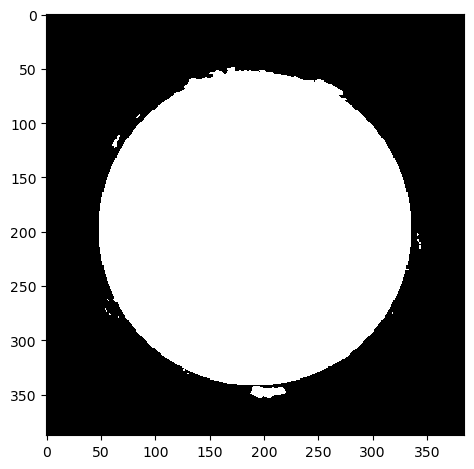

In [20]:
# print image detected as the outlier
io.imshow(ppi.clean_inv_bw_image_lst[ppi.outlier_idx])
plt.show()

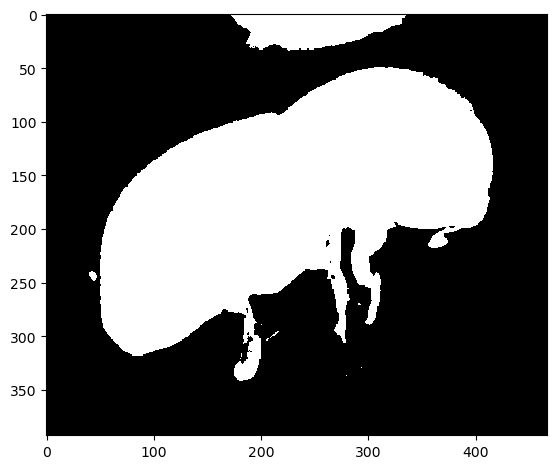

In [26]:
# print image detected as the outlier
io.imshow(ppi.inv_bw_image_lst[13])
plt.show()

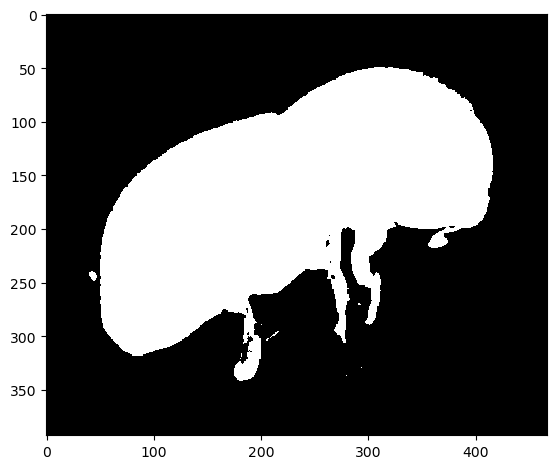

In [27]:
# print image detected as the outlier
io.imshow(ppi.clean_inv_bw_image_lst[13])
plt.show()

In [22]:
ppi.image_selected_df

centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  orientation  \
0    424.759093  1313.377569     202    1105     627    1520    -0.850106   
1    485.402648  2091.239620     241    1856     682    2358     0.992280   
2    514.955990  3221.756661     286    2995     705    3463     1.064298   
3    659.618078  3648.038839     461    3468     849    3853     0.181142   
4    924.367560   597.599678     684     378    1140     786    -0.568485   
5    961.123984  1018.737184     727     813    1213    1368    -0.719845   
6    944.355487  3971.235462     772    3724    1165    4222    -1.264581   
7   1017.609245  2654.072710     826    2438    1230    2881    -0.986616   
8   1070.462301  4439.999440     826    4275    1306    4633     0.297031   
9   1145.558105  2149.215395     959    1923    1317    2405     1.154502   
10  1341.701992  1608.151990    1127    1385    1528    1838     1.050130   
11  1382.113065  3598.372318    1175    3359    1554    3829    -1.180502   
12  1614.168134  1080.755849    1415     827    1757    1325    -1.547111   
13  1646.968232  3479.749023    1469    3254    1862    3721    -1.139109   
14  1824.660912  2291.533595    1593    2078    2074    2484     0.511372   
15  1889.659833  1618.074574    1682    1392    2065    1874     1.116057   
16  1896.986813  2700.508661    1698    2454    2056    2958     1.380842   
17  2006.219674  1279.018927    1780    1109    2223    1467     0.453246   
18  2073.010503  3359.940980    1920    3100    2243    3606     1.407372   
19  2664.140160  2033.430667    2466    1802    2899    2224     0.770049   

    axis_major_length  axis_minor_length      area  area_filled  kmeans_label  \
0          402.728029         191.695341  2.669808        56827             1   
1          478.504153         202.635663  3.215059        66826             1   
2          432.651005         199.071747  3.032609        63665             1   
3          317.400354         265.596263  3.141593        63265             1   
4          426.911157         186.563751  2.700844        56468             1   
5          463.290342         219.629286  3.171389        66429             1   
6          438.281737         203.105663  3.015828        63540             1   
7          408.649080         204.609979  2.786085        58572             1   
8          426.640207         185.206455  2.726731        57249             1   
9          405.842802         192.011864  2.666280        56225             1   
10         409.475693         205.420115  2.851542        60043             1   
11         415.201385         188.792969  2.793475        58781             1   
12         420.890533         183.473224  2.670046        55818             1   
13         422.398862         195.561703  2.846250        59671             1   
14         450.503576         194.633394  3.005816        63100             1   
15         424.512499         191.910145  2.758577        57656             1   
16         442.524926         192.771886  2.934448        61526             1   
17         402.117986         174.812140  2.484403        51791             1   
18         426.786261         189.096952  2.837955        59830             1   
19         411.594151         172.344222  2.511625        52226             1   

   circle_class  pixel_count  
0    non_circle        56001  
1    non_circle        67438  
2    non_circle        63611  
3        circle        65897  
4    non_circle        56652  
5    non_circle        66522  
6    non_circle        63259  
7    non_circle        58440  
8    non_circle        57195  
9    non_circle        55927  
10   non_circle        59813  
11   non_circle        58595  
12   non_circle        56006  
13   non_circle        59702  
14   non_circle        63049  
15   non_circle        57863  
16   non_circle        61552  
17   non_circle        52112  
18   non_circle        59528  
19   non_circle        52683